In [21]:
import numpy as np
import matplotlib.pyplot as plt
from random import random as rand
from scipy.special import erf

## local files
import sys
sys.path.append('..\\')
sys.path.append('..\\utilities')
from physconsts import *
from rbconsts import *

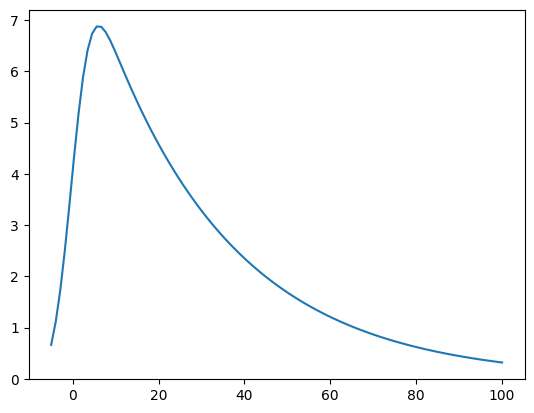

In [25]:
# a piecewise function for the photon's exponential decay temporal wavefunction (0 for t<0) convolved with a Gaussian excitation pulse

t_p = 5 # pulse width
tau = 30 # excited state natural lifetime
decay = lambda t: 0.5*t_p*np.sqrt(np.pi)*np.exp(0.25*(t_p/tau)**2-t/tau)*(1+erf(t/t_p-t_p/(2*tau)))
t_pts = np.linspace(-5,100,100)
plt.plot(t_pts, decay(t_pts))

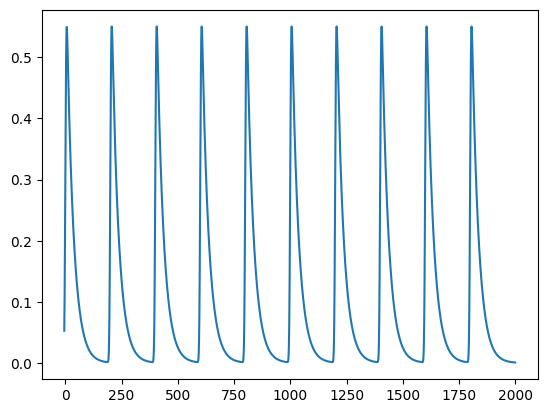

In [174]:
# a piecewise function for the photon's exponential decay temporal wavefunction (0 for t<0) convolved with a Gaussian excitation pulse

t_p = 5 # pulse width
tau = 30 # excited state natural lifetime
n_pulses = 10
t_rep = 200
decay = lambda t: 0.5*t_p*np.sqrt(np.pi)*np.exp(0.25*(t_p/tau)**2-t/tau)*(1+erf(t/t_p-t_p/(2*tau)))/(t_p*np.sqrt(2*np.pi))
decay_series = lambda t: sum([decay(t - i*t_rep) for i in range(n_pulses)])
t_pts = np.linspace(-5,t_rep*n_pulses,10000)
plt.plot(t_pts, decay_series(t_pts))

In [175]:
fmax = max(decay_series(np.linspace(0,tau,100)))

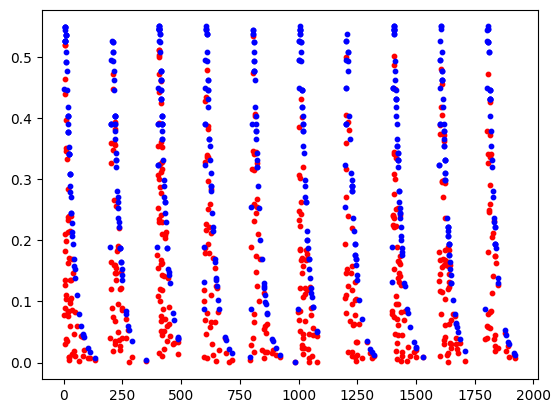

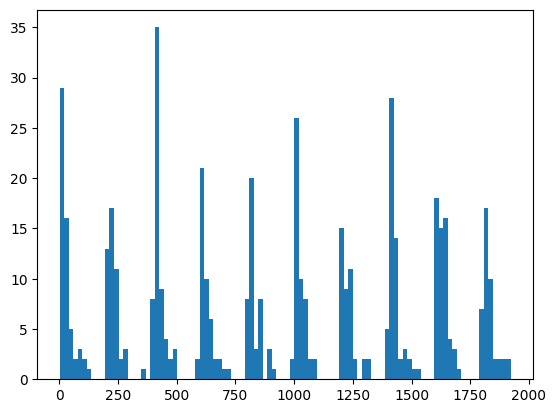

In [176]:
n = 500 # number of measurements
domain = [0,t_rep*n_pulses] # the time range
x1,x2 = domain
func = decay_series

fmax = max(func(np.linspace(0,tau,100)))
y_dist = np.empty(n) 
f_dist = np.empty(n)
x_dist = np.empty(n) # this is the distribution we want
j = 0 # dist index
while j < n:
    x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x), coerced to an int
    f = func(x)
    y = np.random.rand()*fmax # rand val on range of f(x)
    if y <= f:
        y_dist[j]=y
        f_dist[j]=f
        x_dist[j]=x # x vals with approximate gaussian pdf
        j+=1

# check the generated pts
plt.scatter(x_dist,y_dist,c='red',s=10)
plt.scatter(x_dist,f_dist,c='blue',s=10)
plt.show()

# plot what we would want to see in lab
plt.hist(x_dist, bins=100)
plt.show()

In [177]:
# rules: 
# 1. we should not be getting two photons out over the duration of one decay envelope as I have not accounted for any double-excitation or noise here.
# 2. 1 implies that I should pick x on the domain of one pulse at a time, not over all n pulses.
# 3. I should record clicks and timestamps by pulse series, and compute correlations by series.
# 4. The resulting correlations can then be summed for many measurement series.
# 5. For now, we're going to assume we collect one photon for every pulse, i.e. perfect collection efficiency.

n = 1 # number of photons we should get out
measurements = 1000 # number of pulse series
timestamps = np.zeros((measurements,n_pulses), int) # times in ns 
for measurement in range(measurements):
    for pulse in range(n_pulses):
        domain = [pulse*t_rep,t_rep*(pulse+1)] # the time range
        x1,x2 = domain
        func = decay_series
        
        fmax = max(func(np.linspace(0,tau,100)))
        y_dist = np.empty(n)
        f_dist = np.empty(n)
        x_dist = np.empty(n) # this is the distribution we want
        j = 0 # dist index
        while j < n:
            x = int((x2-x1)*np.random.rand()+0.5 + x1) # rand val on domain of f(x), coerced to an int
            f = func(x)
            y = np.random.rand()*fmax # rand val on range of f(x)
            if y <= f:
                y_dist[j]=y
                f_dist[j]=f
                x_dist[j]=x # x vals with approximate gaussian pdf
                j+=1
        timestamps[measurement,pulse] = x_dist[0] # this only makes sense for one photon per pulse

In [224]:
correlations = {}
for time_array in timestamps:
    spcm0_array = np.zeros(n_pulses)
    spcm1_array = np.zeros(n_pulses)
    for i in range(n_pulses):
    # assuming single photons, we get only one click per detector at a time
        if rand() > 0.5:
            spcm0_array[i] = 1
            spcm1_array[i] = 0
        else:
            spcm0_array[i] = 0
            spcm1_array[i] = 1
    for i,count0 in enumerate(spcm0_array):
        for j,count1 in enumerate(spcm1_array):
            delay = time_array[j]-time_array[i]
            bins = int(abs(delay/t_rep) - 0.5)
            if delay in correlations:
                correlations[delay] += count0*count1/(n_pulses - bins)
            else:
                correlations[delay] = count0*count1/(n_pulses - bins)

Text(0, 0.5, 'g(2), arb. units')

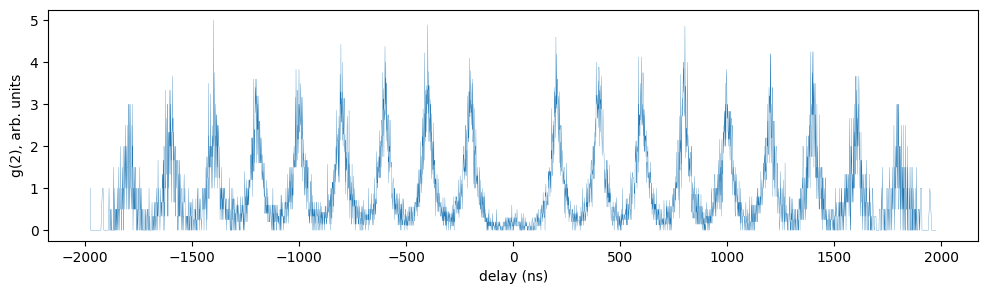

In [212]:
delay_pts, g2_pts = np.array(sorted([[delay, g2] for delay, g2 in correlations.items()],key=lambda x: x[0])).transpose()
# plt.scatter(delay_pts, g2_pts,s=0.1)
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(delay_pts, g2_pts,linewidth=0.2)
ax.set_xlabel('delay (ns)')
ax.set_ylabel('g(2), arb. units')

Text(0, 0.5, 'g(2), arb. units')

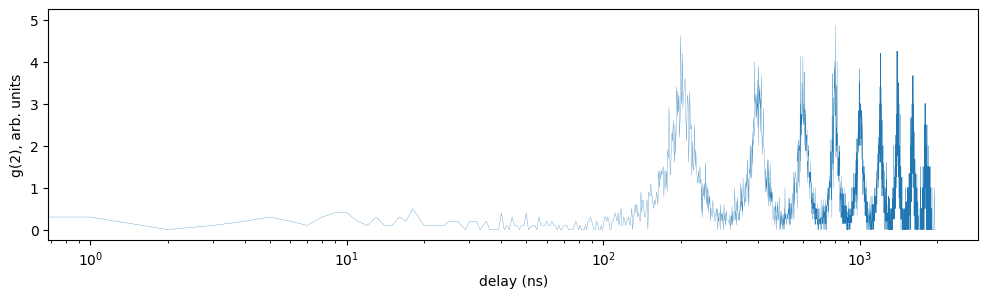

In [220]:
delay_pts, g2_pts = np.array(sorted([[delay, g2] for delay, g2 in correlations.items()],key=lambda x: x[0])).transpose()
# plt.scatter(delay_pts, g2_pts,s=0.1)
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(delay_pts, g2_pts,linewidth=0.2)
ax.set_xscale('log')
ax.set_xlabel('delay (ns)')
ax.set_ylabel('g(2), arb. units')

Text(0, 0.5, 'g(2), arb. units')

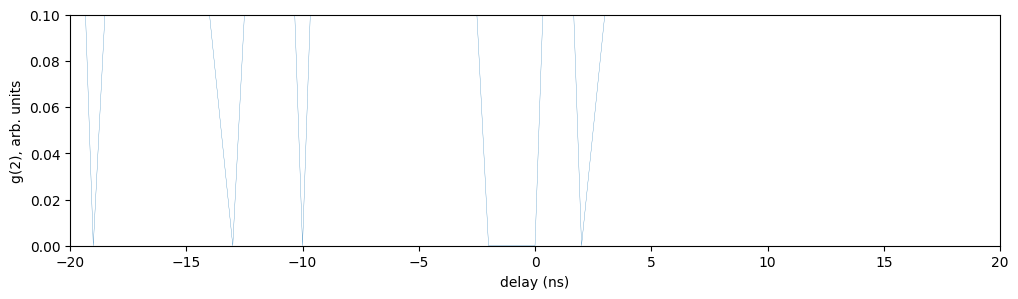

In [222]:
delay_pts, g2_pts = np.array(sorted([[delay, g2] for delay, g2 in correlations.items()],key=lambda x: x[0])).transpose()
# plt.scatter(delay_pts, g2_pts,s=0.1)
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(delay_pts, g2_pts,linewidth=0.2)
ax.set_xlabel('delay (ns)')
ax.set_xlim((-t_rep/10, t_rep/10))
ax.set_ylim((0,0.1))
ax.set_ylabel('g(2), arb. units')

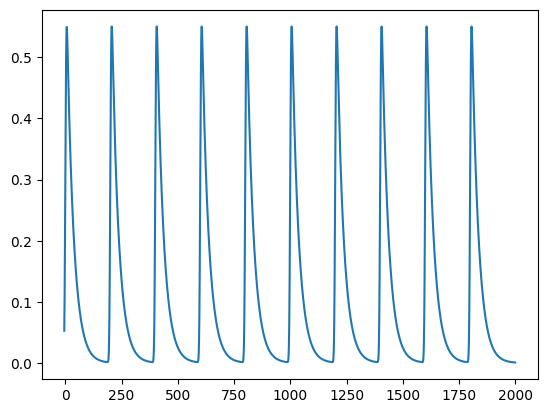

In [174]:
# can I compute g(2) just given this pulse shape function?

"""
g(2) = <E*(t)E(t)E(t-tau)*>
"""

t_p = 5 # pulse width
tau = 30 # excited state natural lifetime
n_pulses = 10
t_rep = 200
decay = lambda t: 0.5*t_p*np.sqrt(np.pi)*np.exp(0.25*(t_p/tau)**2-t/tau)*(1+erf(t/t_p-t_p/(2*tau)))/(t_p*np.sqrt(2*np.pi))
decay_series = lambda t: sum([decay(t - i*t_rep) for i in range(n_pulses)])
t_pts = np.linspace(-5,t_rep*n_pulses,10000)
plt.plot(t_pts, decay_series(t_pts))